In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams.update({
    'font.size': 20,
    'font.family': 'sans-serif', 
    'text.usetex': False,  # Set to True if LaTeX is available
    'axes.linewidth': 1.2,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'xtick.major.size': 5,
    'ytick.major.size': 5,
    'xtick.minor.size': 2.5,
    'ytick.minor.size': 2.5,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'legend.frameon': False,
    'legend.fontsize': 20,
})

In [3]:
# Load data from all cutoff directories
cutoffs = ['local_cube_chgnet', 'full_structure_chgnet', 'local_cube_mace', 'full_structure_mace']
data = {}

for cutoff in cutoffs:
    events = np.load(f'{cutoff}/events.npy')
    barriers = np.load(f'{cutoff}/barriers.npy')
    data[cutoff] = {'events': events, 'barriers': barriers}
    print(f"{cutoff}: {len(events)} events, barriers shape: {barriers.shape}")


local_cube_chgnet: 200 events, barriers shape: (200,)
full_structure_chgnet: 200 events, barriers shape: (200,)
local_cube_mace: 200 events, barriers shape: (200,)
full_structure_mace: 200 events, barriers shape: (200,)


In [4]:
# Verify that all events.npy are the same
reference_events = data['local_cube_chgnet']['events']
all_same = True

for cutoff in cutoffs[1:]:
    if not np.array_equal(reference_events, data[cutoff]['events']):
        print(f"WARNING: {cutoff} events differ from local_cube!")
        all_same = False
    else:
        print(f"{cutoff} events match local_cube ✓")

if all_same:
    print("\n✓ All events.npy files are identical!")
else:
    print("\n✗ Events are NOT identical across cutoffs!")


full_structure_chgnet events match local_cube ✓
local_cube_mace events match local_cube ✓
full_structure_mace events match local_cube ✓

✓ All events.npy files are identical!


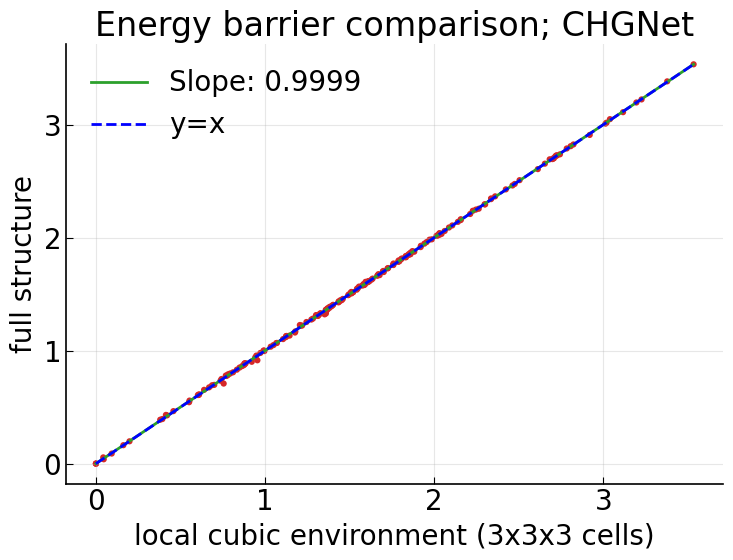

In [ ]:
# Compare barriers across different cutoffs with linear fits (vs cutoff 30.0)
from scipy.stats import linregress

fig, axes = plt.subplots(1, 1, figsize=(8, 6))

cube_1 = data['local_cube_chgnet']['barriers']
barriers_full = data['full_structure_chgnet']['barriers']

# Plot 1: Barrier comparison scatter (1 cell vs 3 cells)
ax = axes
ax.scatter(cube_1, barriers_full, alpha=1, s=20, color='tab:red', edgecolors='none')
slope, intercept, r_value, p_value, std_err = linregress(cube_1, barriers_full)
x_fit = np.array([cube_1.min(), cube_1.max()])
y_fit = slope * x_fit + intercept
ax.plot(x_fit, y_fit, '-', color='tab:green', linewidth=2, label=f'Slope: {slope:.4f}')
ax.plot([cube_1.min(), cube_1.max()], [cube_1.min(), cube_1.max()], 'b--', linewidth=2, label='y=x')
ax.set_xlabel('local cubic environment (3x3x3 cells)')
ax.set_ylabel('full structure')
ax.set_title('Energy barrier comparison: CHGNet')

ax.legend()
ax.grid(True, alpha=0.3)


plt.tight_layout()
plt.savefig('cube_vs_3_cells.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

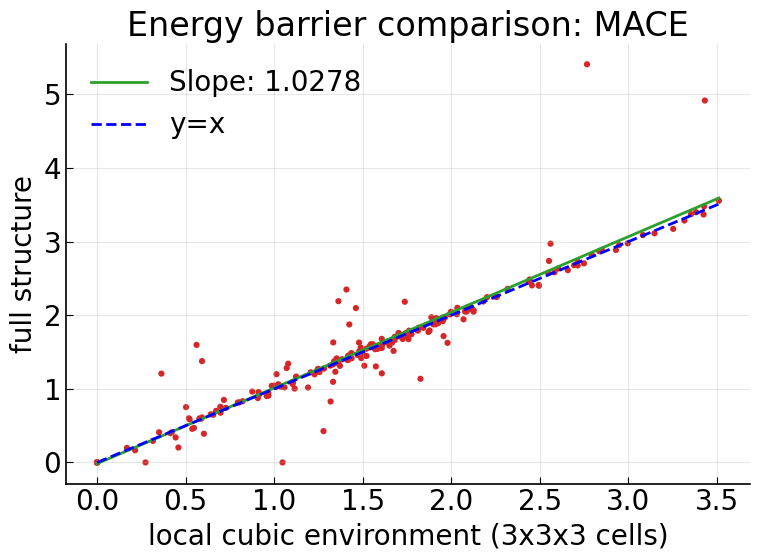

In [10]:
# Compare barriers across different cutoffs with linear fits (vs cutoff 30.0)
from scipy.stats import linregress

fig, axes = plt.subplots(1, 1, figsize=(8, 6))

cube_1 = data['local_cube_mace']['barriers']
barriers_full = data['full_structure_mace']['barriers']

# Plot 1: Barrier comparison scatter (1 cell vs 3 cells)
ax = axes
ax.scatter(cube_1, barriers_full, alpha=1, s=20, color='tab:red', edgecolors='none')
slope, intercept, r_value, p_value, std_err = linregress(cube_1, barriers_full)
x_fit = np.array([cube_1.min(), cube_1.max()])
y_fit = slope * x_fit + intercept
ax.plot(x_fit, y_fit, '-', color='tab:green', linewidth=2, label=f'Slope: {slope:.4f}')
ax.plot([cube_1.min(), cube_1.max()], [cube_1.min(), cube_1.max()], 'b--', linewidth=2, label='y=x')
ax.set_xlabel('local cubic environment (3x3x3 cells)')
ax.set_ylabel('full structure')
ax.set_title('Energy barrier comparison: MACE')

ax.legend()
ax.grid(True, alpha=0.3)


plt.tight_layout()
plt.savefig('cube_vs_3_cells.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

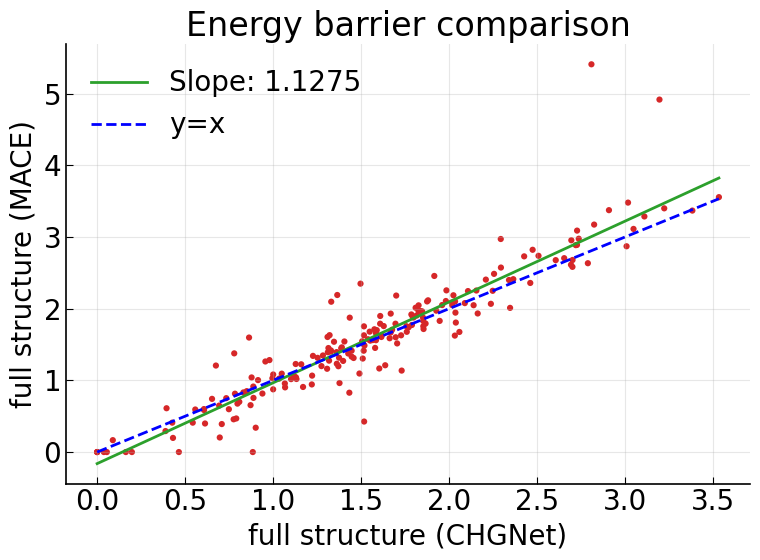

In [11]:
# Compare barriers across different cutoffs with linear fits (vs cutoff 30.0)
from scipy.stats import linregress

fig, axes = plt.subplots(1, 1, figsize=(8, 6))

cube_1 = data['full_structure_chgnet']['barriers']
barriers_full = data['full_structure_mace']['barriers']

# Plot 1: Barrier comparison scatter (1 cell vs 3 cells)
ax = axes
ax.scatter(cube_1, barriers_full, alpha=1, s=20, color='tab:red', edgecolors='none')
slope, intercept, r_value, p_value, std_err = linregress(cube_1, barriers_full)
x_fit = np.array([cube_1.min(), cube_1.max()])
y_fit = slope * x_fit + intercept
ax.plot(x_fit, y_fit, '-', color='tab:green', linewidth=2, label=f'Slope: {slope:.4f}')
ax.plot([cube_1.min(), cube_1.max()], [cube_1.min(), cube_1.max()], 'b--', linewidth=2, label='y=x')
ax.set_xlabel('full structure (CHGNet)')
ax.set_ylabel('full structure (MACE)')
ax.set_title('Energy barrier comparison')

ax.legend()
ax.grid(True, alpha=0.3)


plt.tight_layout()
plt.savefig('cube_vs_3_cells.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()